# PyTorch Tutorial

**William Yue**

In this Jupyter notebook, my goal is to gain familiarity with PyTorch by following the [online tutorials](https://pytorch.org/tutorials/). Hopefully I will know how it works at the end.

## §1 Introduction to PyTorch

### §1.1 Tensors

Let's start by getting `torch` and `numpy` in here.

In [1]:
import torch
import numpy as np

Tensors appear to just be `torch`'s version of a matrix or multi-dimensional array, similar to `numpy`'s ndarrays. The difference is that tensors can run on GPUs or other fast hardware. They are also optimized for automatic differentiation.

#### Initializing a Tensor

There are several ways to make a tensor:

In [2]:
data = [[1,2,3],[4,5,6]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [3]:
np_data = np.arange(6).reshape(2,3)
x_np = torch.tensor(np_data)
print(x_np)

tensor([[0, 1, 2],
        [3, 4, 5]], dtype=torch.int32)


In [4]:
x_ones = torch.ones_like(x_data)
print(x_ones)

x_rand = torch.rand_like(x_data, dtype=torch.float)
print(x_rand)

tensor([[1, 1, 1],
        [1, 1, 1]])
tensor([[0.9070, 0.3716, 0.7858],
        [0.3597, 0.3969, 0.3406]])


Note that we have a problem if we don't convert the `dtype` in the `torch.rand_like` function:

In [6]:
# x_rand_test = torch.rand_like(x_data)

This appears to be because the initial tensor `x_data` has the datatype `long` (64-bit integer, according to [documentation](https://pytorch.org/docs/stable/tensor_attributes.html)), and there is no way to sample a random number in the interval `[0,1)` for this datatype.

We can also directly specify the shape for `torch.rand`, `torch.ones`, and `torch.zeros`:

In [8]:
shape=(2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(rand_tensor,ones_tensor,zeros_tensor,sep='\n')

another_ones_tensor = torch.ones(4,5)
print(another_ones_tensor)

tensor([[0.1019, 0.0122, 0.8198],
        [0.3472, 0.7889, 0.7571]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


There are several attributes of tensors that we can check:

In [9]:
tensor = torch.rand(3,4)

print(tensor.shape)
print(tensor.dtype)
print(tensor.device)

torch.Size([3, 4])
torch.float32
cpu


#### Operations on Tensors

If you're observant, you'll notice that the device above that the tensor is stored on is a CPU! It turns out that by default, all tensors are initialized with `cpu` as their device. I'm on a Makerspace computer that comes with a NVIDIA GPU that supports CUDA, so we'll want to convert the device to a GPU possible. We can first check if CUDA is available before switching the tensor to that using the `.to` command.

In [10]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

print(tensor)

tensor([[0.3753, 0.9576, 0.0174, 0.1257],
        [0.2037, 0.4650, 0.6975, 0.6710],
        [0.3747, 0.2638, 0.1194, 0.6882]])


Looks better now!

Tensors can be operated on similar to `numpy` arrays, with standard indexing and slicing.

In [11]:
tensor = torch.rand(4,4)
print(tensor)

print(tensor[0])
print(tensor[0:1])
print(tensor[:,0])
print(tensor[:,-1])

tensor([[0.7572, 0.8171, 0.7111, 0.8652],
        [0.8017, 0.8379, 0.3607, 0.3772],
        [0.7459, 0.2045, 0.1642, 0.1477],
        [0.7906, 0.6124, 0.2370, 0.8824]])
tensor([0.7572, 0.8171, 0.7111, 0.8652])
tensor([[0.7572, 0.8171, 0.7111, 0.8652]])
tensor([0.7572, 0.8017, 0.7459, 0.7906])
tensor([0.8652, 0.3772, 0.1477, 0.8824])


Note that similar to `numpy` arrays, `tensor[0]` and `tensor[0:1]` have different dimensionalities. We can also do standard concatenation along a given `dim` (not `axis`) using `torch.cat`. 

In [12]:
t0 = torch.cat([tensor]*3, dim=0)
t1 = torch.cat([tensor]*3, dim=1)

print(t0,t1,sep='\n ----- \n')

tensor([[0.7572, 0.8171, 0.7111, 0.8652],
        [0.8017, 0.8379, 0.3607, 0.3772],
        [0.7459, 0.2045, 0.1642, 0.1477],
        [0.7906, 0.6124, 0.2370, 0.8824],
        [0.7572, 0.8171, 0.7111, 0.8652],
        [0.8017, 0.8379, 0.3607, 0.3772],
        [0.7459, 0.2045, 0.1642, 0.1477],
        [0.7906, 0.6124, 0.2370, 0.8824],
        [0.7572, 0.8171, 0.7111, 0.8652],
        [0.8017, 0.8379, 0.3607, 0.3772],
        [0.7459, 0.2045, 0.1642, 0.1477],
        [0.7906, 0.6124, 0.2370, 0.8824]])
 ----- 
tensor([[0.7572, 0.8171, 0.7111, 0.8652, 0.7572, 0.8171, 0.7111, 0.8652, 0.7572,
         0.8171, 0.7111, 0.8652],
        [0.8017, 0.8379, 0.3607, 0.3772, 0.8017, 0.8379, 0.3607, 0.3772, 0.8017,
         0.8379, 0.3607, 0.3772],
        [0.7459, 0.2045, 0.1642, 0.1477, 0.7459, 0.2045, 0.1642, 0.1477, 0.7459,
         0.2045, 0.1642, 0.1477],
        [0.7906, 0.6124, 0.2370, 0.8824, 0.7906, 0.6124, 0.2370, 0.8824, 0.7906,
         0.6124, 0.2370, 0.8824]])


We also have standard arithmetic operations. Three ways to do matrix multiplication are shown below, using `@` and `matmul`. `y1`, `y2`, and `y3` should have the same value. Note that `.T` transposes the matrix.

In [13]:
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand(tensor.shape)
torch.matmul(tensor, tensor.T, out=y3)

tensor([[2.4952, 1.8745, 0.9765, 2.0310],
        [1.8745, 1.6172, 0.8843, 1.5653],
        [0.9765, 0.8843, 0.6470, 0.8843],
        [2.0310, 1.5653, 0.8843, 1.8349]])

If you want to do element-wise multiplication instead, you can use `*` or `mul` instead.

In [14]:
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand(tensor.shape) # note that using torch.rand_like also works
torch.mul(tensor, tensor, out=z3)

tensor([[0.5733, 0.6676, 0.5057, 0.7485],
        [0.6428, 0.7021, 0.1301, 0.1423],
        [0.5564, 0.0418, 0.0270, 0.0218],
        [0.6251, 0.3750, 0.0562, 0.7786]])

If your tensor has one element (for example if you summed everything in the tensor), you can get that element out using `.item()`.

In [15]:
agg = tensor.sum()
print(agg, type(agg), sep='\n')
agg_item = agg.item()
print(agg_item, type(agg_item), sep='\n')

tensor(9.3129)
<class 'torch.Tensor'>
9.312896728515625
<class 'float'>


### §1.2 Datasets and DataLoaders

Ideally, our dataset code is separate from our mdoel training code. This makes it more *readable* and more *modular*. PyTorch has two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset`.

`Dataset` stores the actual data: the samples and labels, while `DataLoader` wraps an iterable around the `Dataset` for easy access to the samples.

There are also plenty of pre-loaded datasets in the PyTorch domain libraries.

#### Loading a Dataset

Let's try to load the [FasionMNIST Dataset](https://research.zalando.com/project/fashion_mnist/fashion_mnist/) from TorchVision. It has 60,000 training exmaples and 10,000 test examples. Each example is a 28-by-28 grayscale image with a label from one of ten classes:

* T-shirt/Top
* Trouser
* Pullover
* Dress
* Coat
* Sandal
* Shirt
* Sneaker
* Bag
* Ankle Boot

In [37]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root='data', # path where train/test data is stored
    train=True, # want the training dataset
    download=True, # download the data from internet if it's not in root
    transform=ToTensor() # transformations -- converts np arrays or PIL images into tensors
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

#### Iterating and Visualizing the Dataset

`Dataset`s can be manually indexed, just like a list: `training_data[index]`. Let's visualize our dataset using `matplotlib`.

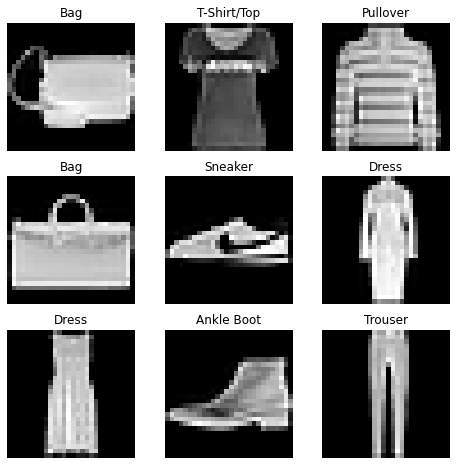

In [38]:
labels_map = {
    0: "T-Shirt/Top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # grabs a single sample from the training_data
    img, label = training_data[sample_idx] # each sample is a tuple with the tensor and label
    figure.add_subplot(rows,cols,i) # draw the subplot at index i
    plt.title(labels_map[label]) # map the labels to the name of the labels and name each subplot
    plt.axis("off") # removes the axes from the plots
    plt.imshow(img[0], cmap="gray") # draw the image in greyscale
plt.show()

#### Creating a Custom Dataset for Files

Custom datasets should extend `torch.utils.data.Dataset` and implement three magic methods: `__init__`, `__len__`, and `__getitem__`. 

Below is an example. Usually, people have `__getitem__` output a tuple, but *Ali Yang* likes using a dictionary, and I do the same.

In [39]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return {'image': image, 'label': label}

#### Preparing Your Data for Training with DataLoaders

`Dataset`s can only retrieve samples one at a time. However, when training, we usually want to pass samples in batches and reshuffle the data each epoch (each cycle through the entire dataset).

`DataLoader`s do all this work for us.

In [40]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

#### Iterate Through the DataLoader

Each iteration in the `DataLoader` below returns a batch of `train_features` and `train_labels`, with `batch_size=64` elements.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


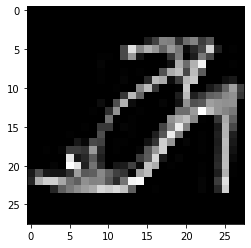

Label: Sandal


In [46]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[label.item()]}")

### §1.3 Transforms

If you were attentive in the previous section, you would've realized that we used `ToTensor()` as a `transform` parameter when initializing the dataset. These **transforms** help us manipulate the data is a dataset to make it suitable for training in a machine learning algorithm.

For TorchVision datasets, all of them contain two parameters, `transform` for the features and `target_tranforms` for the labels. The `torchvision.transforms`module offers several commonly-used transforms.

In [7]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(dim=0,
    index=torch.tensor(y), value=1)) # one-hot encoding the targets
)

_, label = ds[12]
print(label)

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])


#### ToTensor()
`ToTensor()` is a function that converts TIL images or `numpy` arrays into `FloatTensor`s, scalikng the image's pixel intensity values into the range `[0.,1.]`.

#### Lambda Transforms
Lambda transforms will apply any user-defined lambda function. In the example above, we turn the integer into a one-hot encoded tensor.


### §1.4 Build the Neural Network

Neural networks consist of many layers that perform operations on the data. 3Blue1Brown has a nice introductory [video series](https://www.youtube.com/watch?v=aircAruvnKk) on neural networks. The `torch.nn`namespace provides all the necessary building blocks.

In [8]:
import os
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu' # checking if we can run on GPU
print(f'Using {device} as the device')

Using cpu as the device


#### Define the Class

We can define the class of our neural network by inheriting from `nn.Module`, and initializing the model architecture in `__init__`. Every `nn.Module` subclass implements the operations on input data in the `forward` method.

In [10]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__() # initialize as nn.Module first
        self.flatten = torch.nn.Flatten()
        self.linear_relu_stack = torch.nn.Sequential(
            torch.nn.Linear(28*28, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 10),
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### Summary of Section 1

**1.1 Tensors**
* Tensors are PyTorch's version of matrices, similar to `numpy`'s ndarrays.
* There are many ways to create them: `torch.tensor()`, `torch.from_numpy()`, `torch.rand_like()`, and `torch.ones()`.
* We can check if CUDA is on our computer using `torch.cuda.is_available()`. Tensors are normally initialized with device `cpu`, so we need to convert them to CUDA using `.to('cuda')`. The operation `.cuda()` also works.
* Tensors can be sliced like `numpy` arrays using similar operations. There's normal slicing, `tensor.cat` for joining tensors, across dimension `dim`, and standard matrix multiplication or element-wise multiplication by `@` or `*`, respectively (`matmul` and `mul` also work, respectively).
* Given a tensor of a single element, we can use `.item()` to extract it.

**1.2 Datasets & DataLoaders**
* PyTorch has two dataset primitives: `torch.utils.data.Dataset` and `torch.utils.data.Dataloader`. The former stores the actual data while the latter wraps an iterable around the `Dataset` for easy access.
* Datasets can be indexed, e.g. `training_data[index]`.
* Custom datasets should extend the `torch.utils.data.Dataset` class and implement three functions: `__init__`, `__len__`, and `__getitem__`.
* `DataLoader`s provide an easy API for batching the samples in a dataset for training and shuffling them each epoch.

**1.3 Transforms**
* Transforms are a way of modifying the data so they're suitable for training.
* By default, TorchVision datasets have `transform=` for modifying the features and `target_transform=` for modifying the labels.
* A common transform is `ToTensor()` for converting PIL images or `numpy` arrays.
* A `Lambda` transform can also be used for any user-defined lambda function.